## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [74]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [75]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [76]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [77]:
print('unique users:',df.nunique())

unique users: user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64


d. The proportion of users converted.

In [78]:
print("The proportion of users converted is:",df.converted.mean())

The proportion of users converted is: 0.119659193556


e. The number of times the `new_page` and `treatment` don't match.

In [79]:
new_p = (df.query('group!="treatment" and landing_page=="new_page"'))
old_p = (df.query('group!="control" and landing_page=="old_page"'))

unmath = new_p + old_p
print(unmath)
             

        user_id timestamp group landing_page  converted
22          NaN       NaN   NaN          NaN        NaN
240         NaN       NaN   NaN          NaN        NaN
308         NaN       NaN   NaN          NaN        NaN
327         NaN       NaN   NaN          NaN        NaN
357         NaN       NaN   NaN          NaN        NaN
490         NaN       NaN   NaN          NaN        NaN
685         NaN       NaN   NaN          NaN        NaN
713         NaN       NaN   NaN          NaN        NaN
776         NaN       NaN   NaN          NaN        NaN
846         NaN       NaN   NaN          NaN        NaN
850         NaN       NaN   NaN          NaN        NaN
889         NaN       NaN   NaN          NaN        NaN
988         NaN       NaN   NaN          NaN        NaN
1037        NaN       NaN   NaN          NaN        NaN
1106        NaN       NaN   NaN          NaN        NaN
1198        NaN       NaN   NaN          NaN        NaN
1354        NaN       NaN   NaN          NaN    

f. Do any of the rows have missing values?

In [80]:
#check info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [81]:
##  Copy df to new df2 
df2=df
df2 = df[(df.group == 'treatment') & (df.landing_page == 'new_page')]

## App data df2 with fuction append.() in df
df2 = df2.append(df[(df.group == 'control') & (df.landing_page == 'old_page')])

In [82]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 2 to 294476
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


b. There is one **user_id** repeated in **df2**.  What is it?

In [84]:
df2[df2.duplicated('user_id')]


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [85]:
user_id = df2['converted'].mean()
print("row of information user_id", user_id)

row of information user_id 0.119596675671


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [86]:
df2 = df2.drop(df2.index[2893])

In [12]:
df2[df2['user_id'].duplicated() == True ] 

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [87]:
df2.shape

(290584, 5)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [88]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [89]:
control_grp = df2.query('group == "control"')['converted'].mean()
print('the probability has converted =',control_grp)

the probability has converted = 0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [90]:
treatment_grp = df2.query('group == "treatment"')['converted'].mean()
print('the probability has converted =',treatment_grp)

the probability has converted = 0.118808065515


In [17]:
##Find the number of difference in control and treatment.
num_diff =  treatment_grp - control_grp
print('number of difference in control and treatment is ', num_diff)


number of difference in control and treatment is  -0.00157823898536


d. What is the probability that an individual received the new page?

In [91]:
new_page = df2.query('landing_page == "new_page"')['user_id'].count()/df2.shape[0]
print("The probability of  new page is" ,new_page)

The probability of  new page is 0.500061944223


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

### Two pages give values that are very close together, so we can't conclude that the page looks better. But if the value of a particular page is higher, we can decide that  leads to better conversion.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

- H0:  Pnew <= Pold
- H1: Pnew > Pold






`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [92]:
p_new = df2['converted'].mean()
print(" The Convert conversion rate of is p_new:", p_new) 

 The Convert conversion rate of is p_new: 0.119597087245


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [93]:
p_old = df2['converted'].mean()
print(" The Convert conversion rate of is p_old:", p_old) 


 The Convert conversion rate of is p_old: 0.119597087245


c. What is $n_{new}$, the number of individuals in the treatment group?

In [94]:
#think about of landing page in paart I
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [95]:
#think about of group in part I
n_old = df2.query(' landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [96]:
#We have 1's and 0's  Use .choice() for this value
new_page_converted = np.random.choice([0,1], p=(p_new,1-p_new) , size=n_new)# p > 0
new_page_converted

array([1, 1, 0, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [98]:
#We have 1's and 0's  Use .choice() for this value
old_page_converted = np.random.choice([0,1], p=(p_old,1-p_old), size=n_old )# p > 0 
old_page_converted

array([1, 1, 1, ..., 1, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [99]:
simu_value = new_page_converted.sum()/n_new - old_page_converted.sum()/n_old
print(simu_value)

0.000353148887313


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [100]:
p_diffs = []
for _ in range (10000):
    new_page_converted = np.random.choice(2,n_new,p_new)
    old_page_converted = np.random.choice(2,n_old,p_old)
    p_new = new_page_converted.sum() /n_new
    p_old = old_page_converted.sum() /n_old
    p_diffs.append(p_new - p_old)

In [101]:
#NumPy array called p_diffs.
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0.5,1,'The p_diffs Graph')

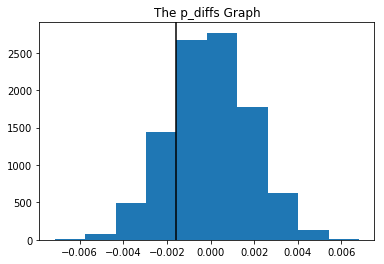

In [102]:
plt.hist(p_diffs)
lines = treatment_grp-control_grp
plt.axvline(x = lines,color='black')
plt.title('The p_diffs Graph')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [104]:
(p_diffs > lines).mean()


0.79949999999999999

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

*There is not enough value to tell us that a new page has a better conversion rate than the old pages. So we fail to reject the Null of hypothesis.
H0:Pnew <= Pold .because Pold 0.803 is larger than Alpha 0.05.

* when P_new greather than P_old we can accept reject the Null of hypothesis.
* when P_new less than P_old we fail to reject the null of hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [105]:
import statsmodels.api as sm
page_old = df2.query('landing_page=="old_page" and converted==1').count()[0]
page_new = df2.query('landing_page=="new_page" and converted==1').count()[0]
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'")) 
print("convert_old ,",str(page_old),"convert_new ,",str(page_new),"n_old , ",str(n_old),"n_new,",str(n_new))

convert_old , 17489 convert_new , 17264 n_old ,  145274 n_new, 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [106]:
z_score, p_value = sm.stats.proportions_ztest([page_new,page_old],[n_new, n_old],alternative='larger')
print("z_score is:", str(z_score) ,"p_value is:" ,str(p_value))

z_score is: -1.31092419842 p_value is: 0.905058312759


In [107]:
from scipy.stats import norm
print(" significant our z-score is:",norm.cdf(z_score))
print(" critical value at 95% confidence is:",norm.ppf(1-(0.05/2)))

 significant our z-score is: 0.094941687241
 critical value at 95% confidence is: 1.95996398454


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

#### From z_score and p_values, we see that the value p_value (0.905058312759) is greater than the value of z_score (-1.31092419842). This means that the user P_old has conversion better than the user P_new, can't reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [108]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [109]:
#Add an intercept
df2['intercept'] = 1
#create dummy for variable
df2[['control', 'ab_page']]=pd.get_dummies(df2['group'])

df2['ab_page'] = pd.get_dummies(df['group']) ['treatment']
df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [110]:
import statsmodels.api as sm
from scipy import stats
statsmodels = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
model = statsmodels.fit()
                                           

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [111]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-05 02:18 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

### Logistic regression       
                                          H1:=Pnew - Pold > 0

*  Related of Regression model is Logistic Regression to make good predictions.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

*It's a good way to add factors to the regression model, which can clearly see changes. But we don't know which direction the results will come out Due to the continued change of information.

*The values we receive may not be accurate because the damaged of data is related.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [112]:
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [54]:
countries['country'].value_counts()
df3 = countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df3.head()


,country,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,1


In [113]:
#Check unique country of data set
countries['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [116]:
#Create dummy for country columns
df3[['US', 'UK', 'CA']] = pd.get_dummies(df3['country'])[['CA','US','UK']]

In [117]:
model = sm.Logit(df3['converted'], df3[['intercept', 'UK', 'US']])
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-05 02:20 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9868    0.0114  -174.1736  0.0000  -2.0092  -1.9645
UK           -0.0099    0.0133    -0.7458  0.4558  -0.0360   0.0161
US           -0.0507    0.0284    -1.7863  0.0740  -0.1064   0.0049
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [119]:
#Create the necessary additional columns
model2 = sm.Logit(df3['converted'], df3[['intercept', 'CA', 'US', 'ab_page']])
#fit the new model
result = model2.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-05 02:20 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
CA            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
US           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
==================================================================

"""

## Conclusions

* The interpreter we obtained doesn't have any p values indicating why P_new has a better change than P_old.


 * - P_new > P_old can accept reject the Null of the hypothesis.
  
  - P_new < P_old fail to accept reject the Null of hypothesis.


* The p-value that we have is greater than 0.5 for both. We are not statistically at all, which will confirm which page has the most change.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [120]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0